In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
min_threshold,max_threshold = df.price.quantile([.001,0.99])
print(min_threshold)
print(max_threshold)

18.0
799.0


In [7]:
df.shape

(48895, 16)

In [8]:
df[(df.price<min_threshold)|(df.price>max_threshold)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,2019-07-02,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,NaN,NaN,1,303


In [9]:
df2 = df[(df.price>min_threshold)&(df.price<max_threshold)]
df2.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16450,13203601,"Sunny, cosmopolitan and modern apartment.",69286284,Kofi,Manhattan,East Harlem,40.79566,-73.94137,Entire home/apt,160,4,57,2019-05-29,1.51,1,31
16408,13174455,Brooklyn room in a New Bldg - 20mns from Manha...,73643860,Aicha,Brooklyn,Bedford-Stuyvesant,40.68846,-73.92155,Private room,65,2,5,2019-06-23,2.24,1,48
33595,26592537,Super cozy & spacious room - house with backya...,27497250,Barbara,Brooklyn,Greenpoint,40.72694,-73.94868,Private room,80,3,5,2018-10-15,0.41,1,55
8865,6797564,Summer in Gramercy Park. New York,35581556,Emma,Manhattan,Gramercy,40.73727,-73.98432,Entire home/apt,120,1,0,NaN,NaN,1,0
647,245607,big 1 bedroom apt very central,825022,Jaidev,Manhattan,Chelsea,40.75127,-73.99637,Entire home/apt,226,5,34,2019-07-01,0.39,1,302
1580,718761,"2 private BRs, private bath - Like your OWN APT",216191,M,Brooklyn,Williamsburg,40.70985,-73.94520,Private room,146,2,8,2019-03-09,0.11,4,88
8584,6609293,Spacious brownstone apt in Park Sl,26228337,Jon,Brooklyn,Park Slope,40.68010,-73.97918,Entire home/apt,120,7,20,2018-05-18,0.43,1,0
38583,30345024,Very cozy apartment in the heart of Ridgewood =),223191465,Kiryl,Queens,Ridgewood,40.70844,-73.90905,Entire home/apt,120,3,16,2019-06-23,2.32,2,60
28301,22001596,Modern chic room in the heart of NY,113918131,Hem,Manhattan,Gramercy,40.73433,-73.98371,Private room,99,5,0,NaN,NaN,1,0
3945,2454507,Close to everything - Jr 1 bedroom,9991763,Andrew,Manhattan,Financial District,40.70781,-74.00701,Entire home/apt,130,365,6,2016-10-02,0.10,1,262


In [10]:
df2.shape

(48353, 16)

In [11]:
df2.price.describe()

count    48353.000000
mean       137.429860
std        102.992656
min         19.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        795.000000
Name: price, dtype: float64

In [12]:
# Assuming 'arr' is an array of values at which you want to evaluate the PDF
arr = [0, 1, 2, 3, 4]

# Mean and standard deviation of the normal distribution
mean = 2
std = 1

# Calculate the probability density function (PDF) for each value in 'arr'
pdf_values = norm.pdf(arr, mean, std)

print("PDF values:", pdf_values * 100)


PDF values: [ 5.39909665 24.19707245 39.89422804 24.19707245  5.39909665]


In [13]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\bhp.csv')

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
min_threshold,max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
print(min_threshold)
print(max_threshold)

1366.184
50959.36200000098


In [16]:
df.shape

(13200, 7)

In [17]:
df2 = df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]
df2.shape

(13172, 7)

In [18]:
df2.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [19]:
four_std_positive = df2.price_per_sqft.mean () + df2.price_per_sqft.std() * 4
four_std_negative = df2.price_per_sqft.mean () - df2.price_per_sqft.std() * 4

In [20]:
print(four_std_positive)
print(four_std_negative)

23227.73653589429
-9900.429065502549


In [21]:
df3 = df2[(df2.price_per_sqft>four_std_negative)&(df2.price_per_sqft<four_std_positive)]

In [22]:
df3.shape

(13047, 7)

In [23]:
df2['z-score'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()

C:\Users\Kamalesh C\AppData\Local\Temp\ipykernel_10332\3985395536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z-score'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()


In [24]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [25]:
df4 = df2[(df2['z-score']<4)&(df2['z-score']>-4)]

In [26]:
df4.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
8818,Banashankari Stage VI,2 BHK,1180.0,2.0,59.47,2,5039,-0.392332
1900,other,2 BHK,1100.0,2.0,106.00,2,9636,0.717781
3558,other,2 BHK,970.0,2.0,40.00,2,4123,-0.613533
2989,Raja Rajeshwari Nagar,2 BHK,1419.0,2.0,48.00,2,3382,-0.792475
9195,Electronics City Phase 1,2 BHK,1314.0,2.0,60.00,2,4566,-0.506555
8668,other,4 Bedroom,600.0,4.0,77.00,4,12833,1.489813
12301,other,3 BHK,1115.0,3.0,39.14,3,3510,-0.761564
4570,Hebbal Kempapura,3 BHK,1654.0,2.0,85.00,3,5139,-0.368183
8461,Electronic City,2 BHK,1128.0,2.0,65.58,2,5813,-0.205421
2440,other,3 Bedroom,1200.0,3.0,225.00,3,18750,2.918688


In [27]:
df4.shape

(13047, 8)

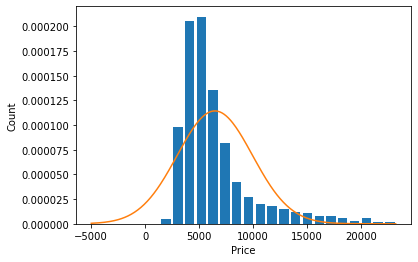

In [28]:
plt.hist(df4['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Price')
plt.ylabel('Count')

arr = np.arange(-5000,df4.price_per_sqft.max(),100)
plt.plot(arr,norm.pdf(arr,df4.price_per_sqft.mean(),df4.price_per_sqft.std()))
plt.show()

In [29]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\weight-height.csv')

In [30]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


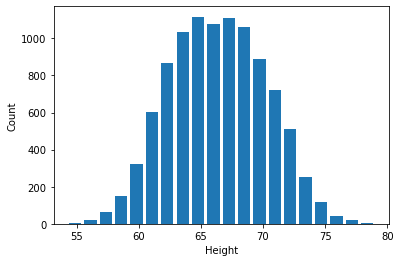

In [31]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

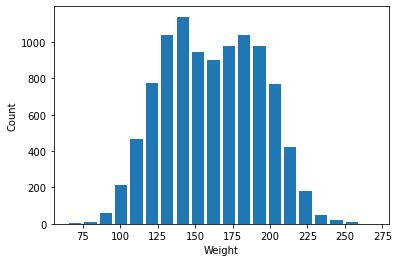

In [32]:
plt.hist(df.Weight,bins=20,rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

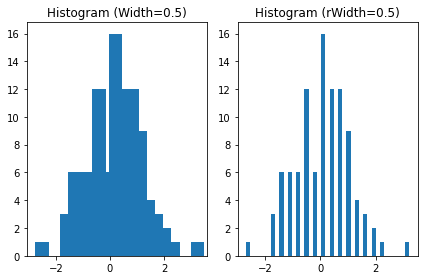

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random numbers from a standard normal distribution
data = np.random.randn(100)

# Plot the histogram with width=0.5
plt.subplot(1, 2, 1)  # Create subplot (1 row, 2 columns, first plot)
plt.hist(data, bins=20, width=0.5)
plt.title('Histogram (Width=0.5)')

# Plot the histogram with rwidth=0.5
plt.subplot(1, 2, 2)  # Create subplot (1 row, 2 columns, second plot)
plt.hist(data, bins=20, rwidth=0.5)
plt.title('Histogram (rWidth=0.5)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [34]:
H1 = df.Height.quantile(.25)
H3 = df.Height.quantile(.75)
W1 = df.Weight.quantile(.25)
W3 = df.Weight.quantile(.75)
IQR_H = H3 - H1
IQR_W = W3 - W1

In [35]:
lower_H = H1 - 1.5*IQR_H
upper_H = H3 + 1.5*IQR_H
lower_W = W1 - 1.5*IQR_W
upper_W = W3 + 1.5*IQR_W
print(lower_H,upper_H,lower_W,upper_W)

55.00265861279534 77.67722359525831 58.79084096072856 264.19673521345646


In [36]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [37]:
df2 = df[(df.Weight>lower_W)&(df.Weight<upper_W)&(df.Height>lower_H)&(df.Height<upper_H)]

In [38]:
df[(df.Weight<lower_W)|(df.Weight>upper_W)|(df.Height<lower_H)|(df.Height>upper_H)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [39]:
df2.shape

(9992, 3)